# Create The Dataset

In [1]:
import pandas as pd
import numpy as np
import math
from numpy.random import randint
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

np.random.seed(101)

In [2]:
dfCategory = pd.DataFrame(columns=['id', 'nama'], 
                          data=[[1, 'Category1'],[2, 'Category2'], [3, 'Category3'], [4, 'Category4'],[5,'Category5']])

dfCategory

,id,nama
0,1,Category1
1,2,Category2
2,3,Category3
3,4,Category4
4,5,Category5


In [3]:
vendorList = []
for i,year in zip(range(1,21), randint(2015,2019,20)):
    vendorList.append([i, 'Vendor' + str(i), year]);
dfVendor = pd.DataFrame(columns=['id', 'nama', 'joinYear'], 
                        data=vendorList)
dfVendor.head()

,id,nama,joinYear
0,1,Vendor1,2018
1,2,Vendor2,2018
2,3,Vendor3,2016
3,4,Vendor4,2017
4,5,Vendor5,2018


In [4]:
productList = []
for i,cId,vId,price,totalStock in zip(range(1,101), randint(1,6,100), randint(1,len(dfVendor)+1,100), randint(5,100,100), randint(25,51,100)):
    productList.append([i, 'Product' + str(i), cId, vId, price, totalStock, randint(math.floor(price/5)-1, (totalStock+1)-math.floor((100-price)*20/100))]);
dfProduct = pd.DataFrame(columns=['id','nama','categoryid', 'vendorid','price','totalStock', 'stockSekarang'],
                 data=productList)
dfProduct.head()

,id,nama,categoryid,vendorid,price,totalStock,stockSekarang
0,1,Product1,5,14,39,31,12
1,2,Product2,1,16,81,40,25
2,3,Product3,2,18,99,43,38
3,4,Product4,4,1,25,41,19
4,5,Product5,3,16,74,26,21


In [5]:
dfProduct['categoryid'].value_counts()

4    29
5    24
3    19
2    15
1    13
Name: categoryid, dtype: int64

In [6]:
dfProduct['vendorid'].value_counts()

19    8
8     8
18    7
16    7
4     6
9     6
17    5
2     5
13    5
12    5
11    5
7     5
3     5
5     5
14    4
20    3
1     3
6     3
15    3
10    2
Name: vendorid, dtype: int64

In [7]:
dfProduct.to_csv('Product.csv', index=False)

In [39]:
dfProduct['stockTerjual'] = dfProduct['totalStock'] - dfProduct['stockSekarang']
dfProduct['totalIncome'] = (dfProduct['stockTerjual'] * dfProduct['price']) * (10/100)
dfProduct.head()

,id,nama,categoryid,vendorid,price,totalStock,stockSekarang,stockTerjual,totalIncome
0,1,Product1,5,14,39,31,12,19,74.1
1,2,Product2,1,16,81,40,25,15,121.5
2,3,Product3,2,18,99,43,38,5,49.5
3,4,Product4,4,1,25,41,19,22,55.0
4,5,Product5,3,16,74,26,21,5,37.0


In [41]:
def categoryPrice(price) :
    if(price < 30) :
        return 'Murah'
    elif(price < 60) :
        return 'Sedang'
    return 'Mahal'

dfProduct['catprice'] = list(map(categoryPrice, dfProduct['price']))
dfProduct.head()

,id,nama,categoryid,vendorid,price,totalStock,stockSekarang,stockTerjual,totalIncome,catprice
0,1,Product1,5,14,39,31,12,19,74.1,Sedang
1,2,Product2,1,16,81,40,25,15,121.5,Mahal
2,3,Product3,2,18,99,43,38,5,49.5,Mahal
3,4,Product4,4,1,25,41,19,22,55.0,Murah
4,5,Product5,3,16,74,26,21,5,37.0,Mahal


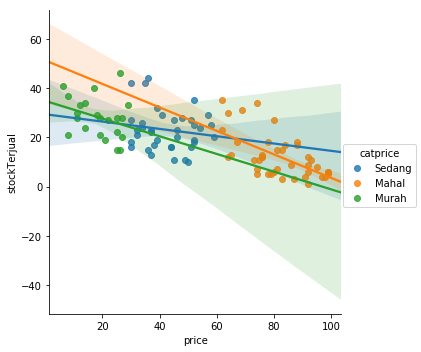

In [45]:
sns.lmplot(x='price', y='stockTerjual', hue='catprice', data=dfProduct)

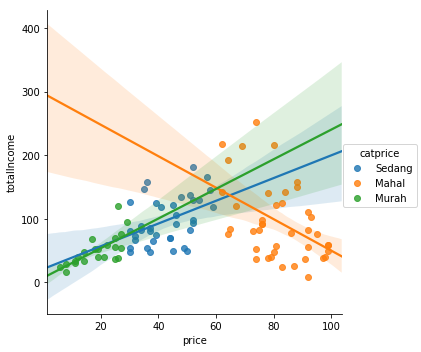

In [46]:
sns.lmplot(x='price', y='totalIncome', data=dfProduct, hue='catprice')

C:\Users\harto\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


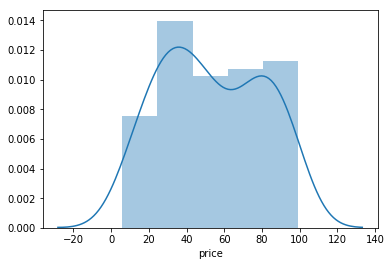

In [49]:
sns.distplot(dfProduct['price'])

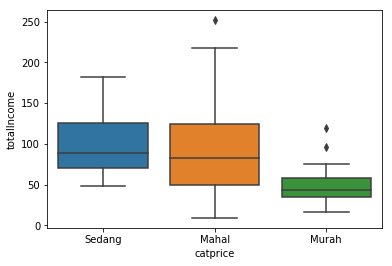

In [53]:
sns.boxplot(x='catprice', y='totalIncome', data=dfProduct)

In [56]:
print('Total Stock Barang Murah : ' + str(sum(dfProduct[dfProduct['catprice'] == 'Murah']['totalStock'])))
print('Total Stock Barang Sedang : ' + str(sum(dfProduct[dfProduct['catprice'] == 'Sedang']['totalStock'])))
print('Total Stock Barang Mahal : ' + str(sum(dfProduct[dfProduct['catprice'] == 'Mahal']['totalStock'])))

Total Stock Barang Murah : 845
Total Stock Barang Sedang : 1434
Total Stock Barang Mahal : 1513


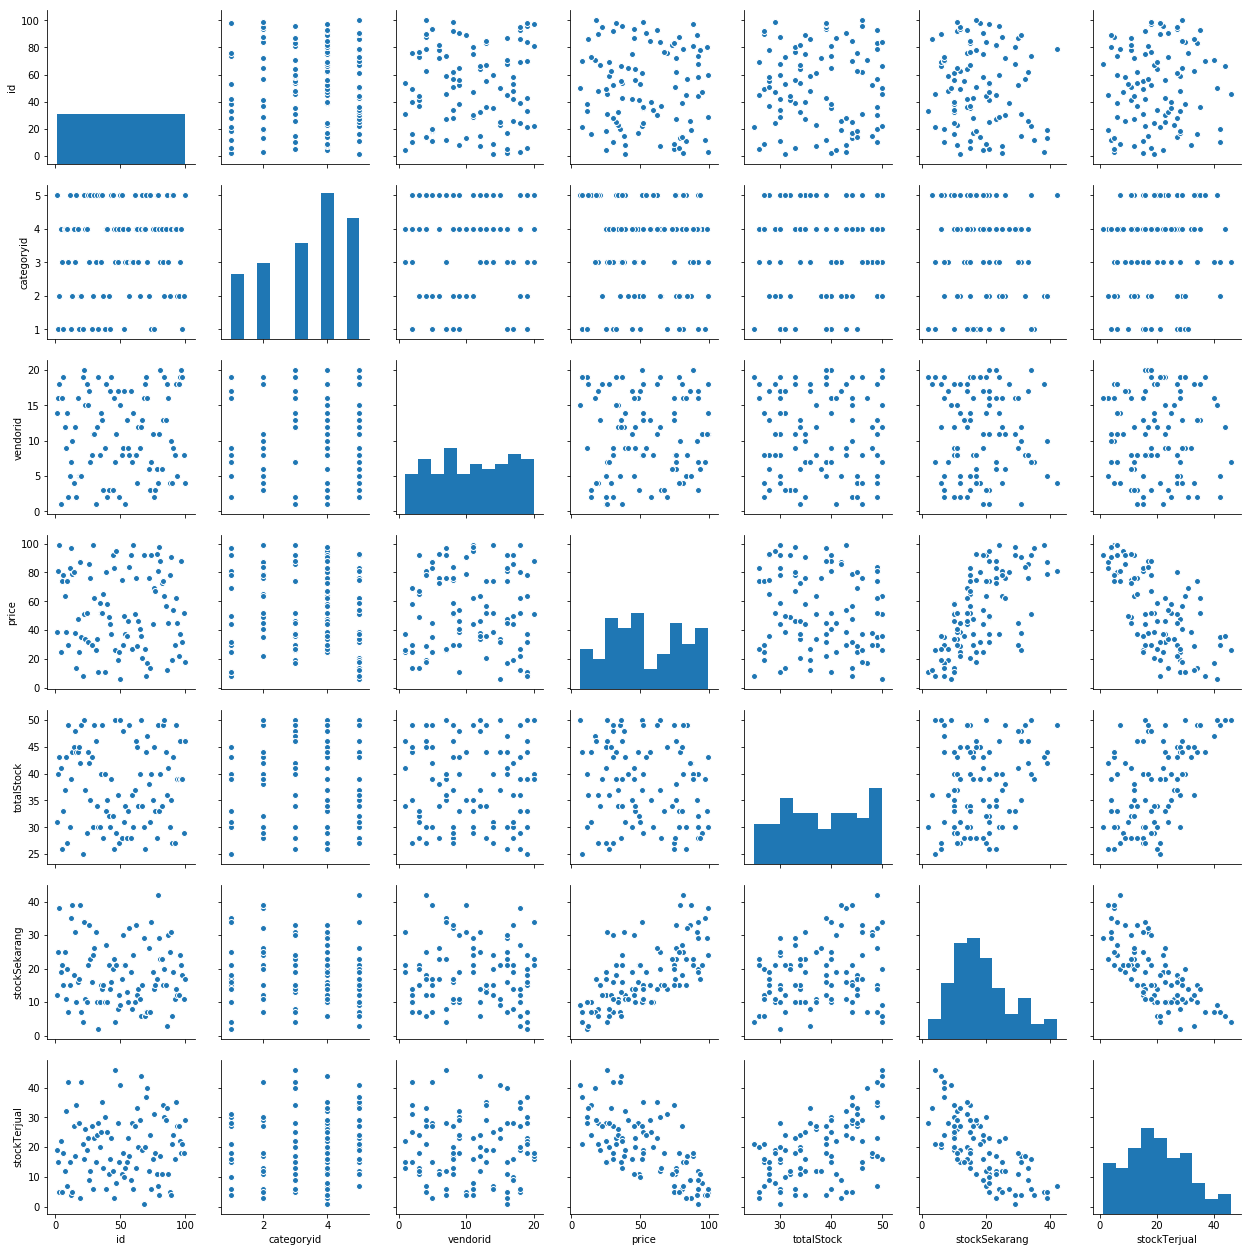

In [10]:
sns.pairplot(dfProduct)

In [11]:
dfVendor['joinYear'].value_counts()

2018    7
2015    6
2016    5
2017    2
Name: joinYear, dtype: int64

In [12]:
print(len(dfVendor))
print(len(dfProduct))

20
100


In [30]:
len(dfProduct[dfProduct['totalStock'] <= dfProduct['stockTerjual']])

0

In [14]:
dfProduct[dfProduct['totalStock'] <= dfProduct['stockTerjual']]

,id,nama,categoryid,vendorid,price,totalStock,stockSekarang,stockTerjual


In [15]:
dfCategory.to_csv('Category.csv', index=False)

In [16]:
dfVendor.to_csv('Vendor.csv', index=False)

In [17]:
y = dfProduct['stockTerjual']

In [18]:
X = dfProduct[['price', 'totalStock']]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-0.23629599  0.66520905]


In [24]:
print(lm.intercept_)

7.529423922960959


In [25]:
predictions = lm.predict( X_test)

Text(0,0.5,'Predicted Y')

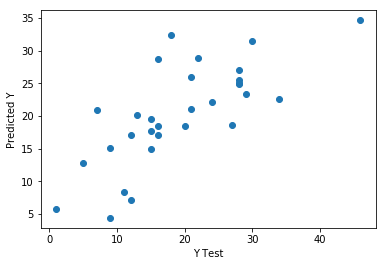

In [26]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [27]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5.263360738013915
MSE: 43.83336026159721
RMSE: 6.620676722329614


C:\Users\harto\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


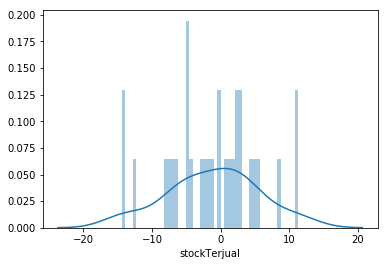

In [28]:
sns.distplot((y_test-predictions),bins=50);

In [29]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
price,-0.236296
totalStock,0.665209
